In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
terrorism_df=pd.read_csv('terrorism.csv')

C:\Users\srujan navalkar\AppData\Local\Temp\ipykernel_8240\3423448950.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terrorism_df=pd.read_csv('terrorism.csv')


In [8]:
terrorism_df.head()
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


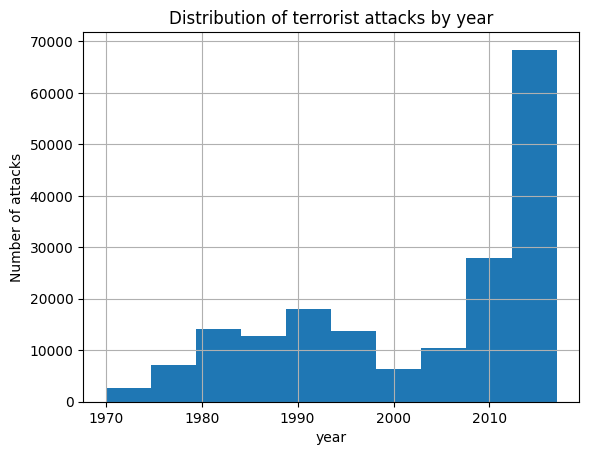

In [11]:
terrorism_df['iyear'].hist()
plt.xlabel('year')
plt.ylabel('Number of attacks')
plt.title('Distribution of terrorist attacks by year')
plt.show()

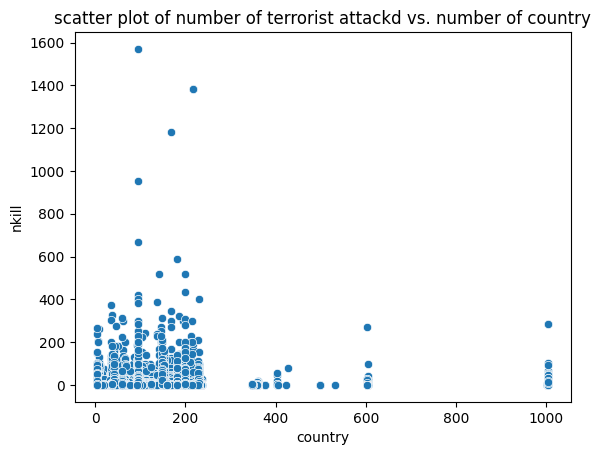

In [13]:
sns.scatterplot(x='country',y='nkill', data=terrorism_df)
plt.title('scatter plot of number of terrorist attackd vs. number of country')
plt.show()

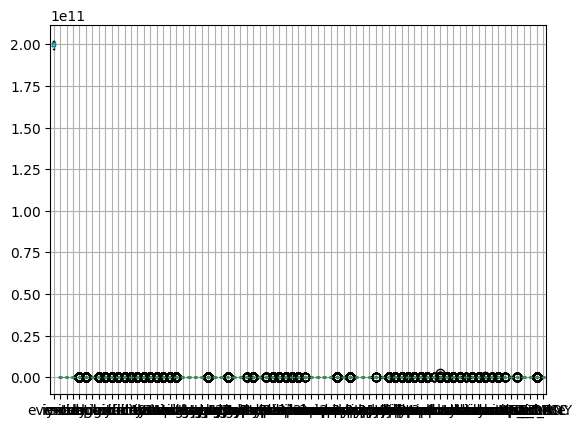

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [14]:
terrorism_df.boxplot()
plt.show()
terrorism_df.isnull().sum()

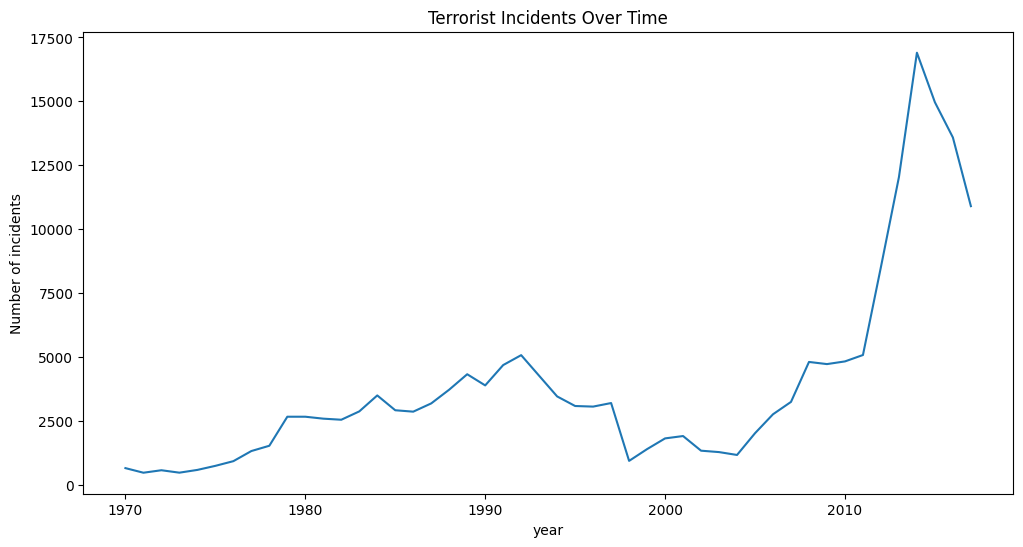

In [16]:
plt.figure(figsize=(12,6))
terrorism_df['iyear'].value_counts().sort_index().plot(kind='line')
plt.title('Terrorist Incidents Over Time')
plt.xlabel('year')
plt.ylabel('Number of incidents')
plt.show()

In [34]:
import folium
terrorism_df= terrorism_df.dropna(subset=['latitude', 'longitude'])
terrorism_df['latitude'].fillna(0, inplace=True)
terrorism_df['longitude'].fillna(0, inplace=True)
m = folium.Map(location=[0,0], zoom_start=2)
for index, row in terrorism_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'],row['longitude']],
        radius=5,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

m.save('terrorism_map.html')

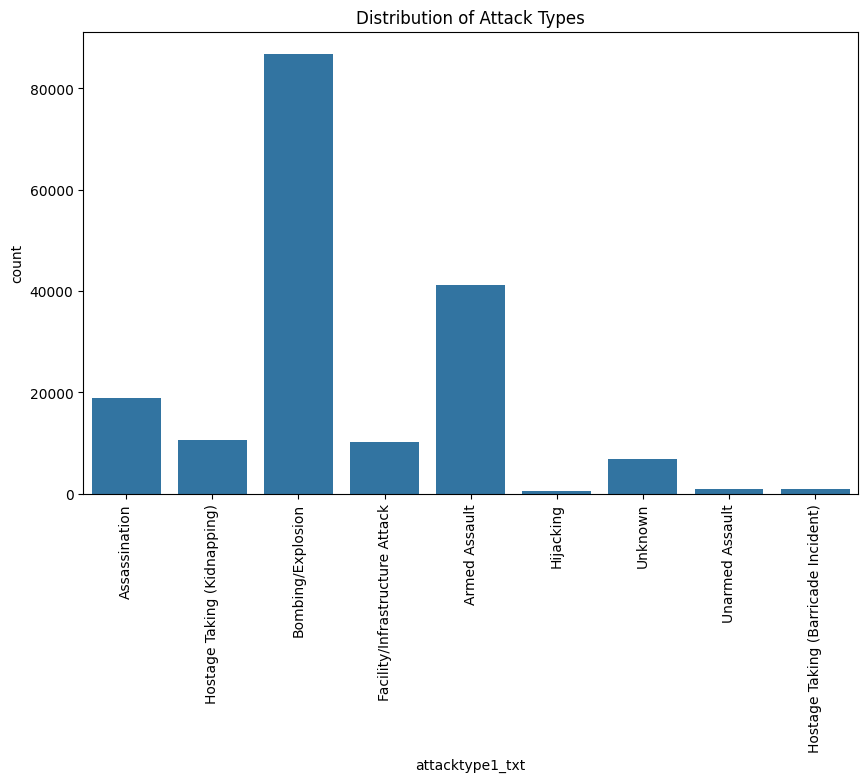

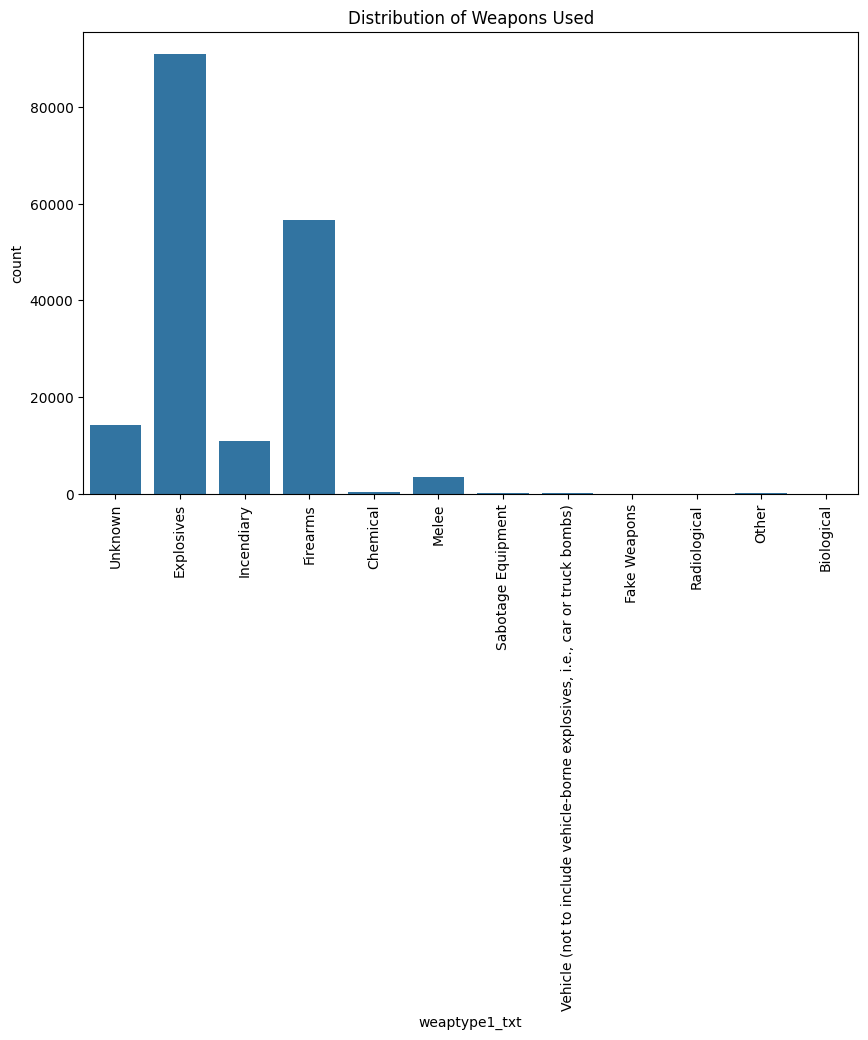

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 


plt.figure(figsize=(10,6))
sns.countplot(x='attacktype1_txt',data=terrorism_df)
plt.title('Distribution of Attack Types')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='weaptype1_txt',data=terrorism_df)
plt.title('Distribution of Weapons Used')
plt.xticks(rotation=90)
plt.show()

In [54]:
from scipy.stats import ttest_ind

# Hypothesis testing example: Compare the number of incidents in two regions
region1_data = terrorism_df[terrorism_df['region'] == 1]
region2_data = terrorism_df[terrorism_df['region'] == 2]

t_stat, p_value = ttest_ind(region1_data['nkill'], region2_data['nkill'], equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: nan
P-value: nan
